In [25]:
import helperFunctions
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense

In [5]:
ticker = 'BTC'
stableCoin = 'USDT'
timeInterval = '1hr'
startDate = '01 Jan, 2019'
endDate ='01 Jan, 2022'
historicalLength = 256
predictionLength = 12

In [2]:
rawDf = helperFunctions.fetchBianceData(
    ticker=ticker,
    timeInterval=timeInterval,
    startDate=startDate,
    endDate=endDate
)

NameError: name 'ticker' is not defined

In [6]:
featuresDf = helperFunctions.generateFeatures(
    ticker = ticker,
    stableCoin = stableCoin,
    timeInterval = timeInterval,
    historicalLength = historicalLength,
    predictionLength = predictionLength,
)

<AxesSubplot:xlabel='trendChange', ylabel='Count'>

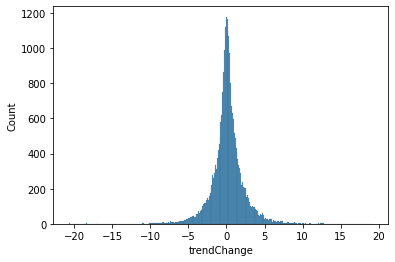

In [7]:
sns.histplot(featuresDf['trendChange'])

In [8]:
featuresDf['trendChange'].describe()

count    25979.000000
mean         0.142943
std          2.181507
min        -20.752666
25%         -0.724078
50%          0.098319
75%          1.027294
max         19.267021
Name: trendChange, dtype: float64

In [9]:
trendedDfBinary = helperFunctions.labelDataframeBinary(df=featuresDf, midCut=0, ticker=ticker, stableCoin=stableCoin, timeInterval=timeInterval)
trendedDfMultiLabel = helperFunctions.labelDataframeMultilabel(df=featuresDf, lowerCut=-1, upperCut=1, ticker=ticker, stableCoin=stableCoin, timeInterval=timeInterval)

0: downward trend, 1: up trend
0: downward trend, 1: sideways trend, 2: up trend


/Users/naolbasaye/Desktop/MachineLearningPricePrediction/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

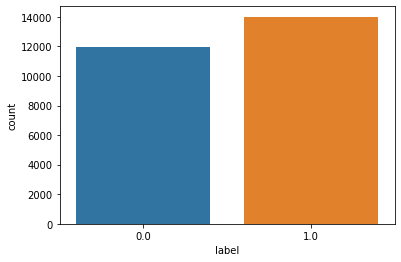

In [10]:
sns.countplot(trendedDfBinary['label'])

/Users/naolbasaye/Desktop/MachineLearningPricePrediction/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

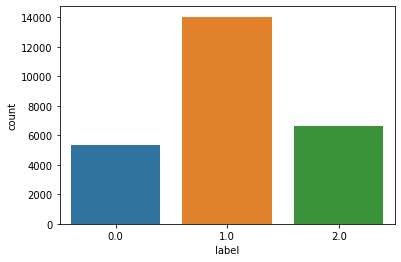

In [11]:
sns.countplot(trendedDfMultiLabel['label'])

In [12]:
xTrainBinary, yTrainBinary, xTestBinary, yTestBinary = helperFunctions.generateTrainTestDatasetBinary(df=trendedDfBinary, ticker=ticker, timeInterval=timeInterval)

Binary xTrain, yTrain, xTest, yTest saved in data and returned


In [13]:
xTrainMultiLabel, yTrainMultiLabel, xTestMultiLabel, yTestMultiLabel = helperFunctions.generateTrainTestDatasetMultiLabel(df=trendedDfMultiLabel, ticker=ticker, timeInterval=timeInterval)

Multi label xTrain, yTrain, xTest, yTest saved in data and returned


Binary

In [21]:
epochs = 15
cnnModelBinary = tf.keras.Sequential([
    Conv1D(filters=32, kernel_size=4, input_shape=(xTrainBinary.shape[1], 1), padding='same', activation='relu'),

    Dropout(0.3),
    MaxPooling1D(pool_size=2, padding='same'),
    Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'),

    # Dropout(0.3),
    MaxPooling1D(pool_size=2, padding='same'),
    Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'),

    # Dropout(0.3),
    MaxPooling1D(pool_size=2, padding='same'),
    Conv1D(filters=256, kernel_size=4, padding='same', activation='relu'),

    Dropout(0.3),
    MaxPooling1D(pool_size=2, padding='same'),
    Conv1D(filters=512, kernel_size=4, activation='relu'),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(yTrainBinary.shape[1], activation='softmax')
])

cnnModelBinary.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

In [29]:
cnnModelBinaryHistory = cnnModelBinary.fit(
    xTrainBinary, yTrainBinary, validation_split=0.3, epochs=epochs, batch_size=512, verbose=0
)

In [30]:
cnnModelBinaryHistoryDf = pd.DataFrame(cnnModelBinaryHistory.history)
cnnModelBinaryHistoryDf.to_csv(f'data/{ticker}{stableCoin}_{timeInterval}_binary_model_fitting.csv')

Multilabel

In [31]:
epochs = 15
cnnModelMultiLabel = tf.keras.Sequential([
    Conv1D(filters=32, kernel_size=4, input_shape=(xTrainMultiLabel.shape[1], 1), padding='same', activation='relu'),

    Dropout(0.3),
    MaxPooling1D(pool_size=2, padding='same'),
    Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'),

    # Dropout(0.3),
    MaxPooling1D(pool_size=2, padding='same'),
    Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'),

    # Dropout(0.3),
    MaxPooling1D(pool_size=2, padding='same'),
    Conv1D(filters=256, kernel_size=4, padding='same', activation='relu'),

    Dropout(0.3),
    MaxPooling1D(pool_size=2, padding='same'),
    Conv1D(filters=512, kernel_size=4, activation='relu'),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(yTrainMultiLabel.shape[1], activation='softmax')
])

cnnModelMultiLabel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

In [32]:
cnnModelMultiLabelHistory = cnnModelMultiLabel.fit(
    xTrainMultiLabel, yTrainMultiLabel, validation_split=0.3, epochs=epochs, batch_size=512, verbose=1
)

Epoch 1/15


2022-07-16 19:30:56.633904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-16 19:30:59.837862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 - 4s - loss: 1.0492 - categorical_accuracy: 0.5194 - val_loss: 0.9905 - val_categorical_accuracy: 0.5418 - 4s/epoch - 178ms/step
Epoch 2/15
25/25 - 3s - loss: 0.9761 - categorical_accuracy: 0.5388 - val_loss: 0.9628 - val_categorical_accuracy: 0.5482 - 3s/epoch - 124ms/step
Epoch 3/15
25/25 - 3s - loss: 0.9610 - categorical_accuracy: 0.5499 - val_loss: 0.9545 - val_categorical_accuracy: 0.5499 - 3s/epoch - 116ms/step
Epoch 4/15
25/25 - 3s - loss: 0.9440 - categorical_accuracy: 0.5565 - val_loss: 0.9422 - val_categorical_accuracy: 0.5574 - 3s/epoch - 119ms/step
Epoch 5/15
25/25 - 3s - loss: 0.9348 - categorical_accuracy: 0.5648 - val_loss: 0.9340 - val_categorical_accuracy: 0.5651 - 3s/epoch - 129ms/step
Epoch 6/15
25/25 - 3s - loss: 0.9114 - categorical_accuracy: 0.5812 - val_loss: 0.8978 - val_categorical_accuracy: 0.5889 - 3s/epoch - 118ms/step
Epoch 7/15
25/25 - 3s - loss: 0.8814 - categorical_accuracy: 0.6056 - val_loss: 0.8647 - val_categorical_accuracy: 0.6321 - 3s/epoch - 

In [34]:
cnnModelMultiLabelHistoryDf = pd.DataFrame(cnnModelMultiLabelHistory.history)
cnnModelMultiLabelHistoryDf.to_csv(f'data/{ticker}{stableCoin}_{timeInterval}_multi_label_model_fitting.csv')